# Deterministic finite automata

In [1]:
from tock import *

## Loading DFAs from files

Sipser and other textbooks represent DFAs, and all kinds of automata, using either tables or graphs. You can create automata either way and load them into Tock.

To create tables, you can use any spreadsheet software (Excel, OpenOffice, iWork, Google Drive) and export in CSV or Excel (`.xlsx`) format. Then read it into Tock using the `read_csv` or `read_excel` function.

In [2]:
m = read_csv("examples/sipser-1-4.csv")

Graphs should be in Trivial Graph Format (TGF), which most graph-editing software ([yED], [Gephi]) can export in. Then a graph can be read into Tock using the `read_tgf` function.

[yED]: http://www.yworks.com/en/products/yfiles/yed/
[Gephi]: http://gephi.github.io

In [3]:
m = read_tgf("examples/sipser-1-4.tgf")

## Creating DFAs in code

You can also use Tock functions to create an automaton in code.

In [4]:
m = FiniteAutomaton()
m.set_start_state('q1')
m.add_accept_state('q2')
m.add_transition('q1, 0 -> q1')
m.add_transition('q1, 1 -> q2')

You can also specify a transition as two strings or two lists of strings.

In [5]:
m.add_transition('q2, 0', 'q3')
m.add_transition(['q2', '1'], ['q3'])

And you can use `m.add_transitions` to add several transitions at once.

In [6]:
m.add_transitions(['q3, 0 -> q2',
                   'q3, 1 -> q2'])

# Editing DFAs graphically

In a Jupyter notebook, you can edit a DFA graphically.

In [7]:
m.edit()

<IPython.core.display.Javascript object>

## Inspecting DFAs

Once a machine is loaded, we can test whether it is indeed a DFA:

In [8]:
m.is_finite() # is it a finite automaton?

True

In [9]:
m.is_deterministic() # is it deterministic?

True

Regardless of how it was created and loaded, it can be viewed as a table:

In [10]:
to_table(m)

,0,1
>q1,q1,q2
@q2,q3,q3
q3,q2,q2


This machine has three states, listed in the first column: `q1`, `q2`, and `q3`. The `>` means that `q1` is the start state (the state the machine starts in), and the `@` means that `q2` is a final state (meaning that when the machine has read all of the input, it accepts the input iff it is in a final state). These symbols are not part of the state name.

The first row lists all possible input symbols (here, `0` and `1`), and the interior cells indicate what the new state should be after reading a symbol. For example, if the machine is in state `q1` and reads a `1`, then it changes to state `q2`.

It's more convenient to visualize the automaton's operation using a state transition diagram:

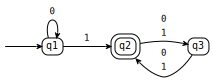

In [11]:
to_graph(m)

You can also iterate over all transitions:

In [12]:
for t in m.get_transitions(): print(t)

q1,0 → q1
q1,1 → q2
q2,0 → q3
q2,1 → q3
q3,0 → q2
q3,1 → q2


## Running DFAs

Now let's run the automaton on a string (remember to separate symbols by spaces):

In [13]:
run(m, '0 0 0 1 1 1').only_path()

q1,[0] 0 0 1 1 1
q1,[0] 0 1 1 1
q1,[0] 1 1 1
q1,[1] 1 1
q2,[1] 1
q3,1
q2,ε


At each time step, this shows the state and the remainder of the input, with square brackets on the next-to-be-read symbol.

The return value of `run` is actually a graph:

In [14]:
run(m, '0 0 0 1 1 1')

KeyError: 'label'

Each node says what state the machine is at a time step, and on the right is the input string, with the next symbol marked with square brackets. The run ends with a double node, indicating that at the end of the input string, the machine was in a final state, so it accepted the string.

Let's try a different string:

In [15]:
run(m, '1 0 0 0')

KeyError: 'label'

This time, the fact that the run doesn't end with a double node means that the string was rejected.